In [2]:
from NMR_ML import Dataset, Polynomial_features
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Create the dataset object
gaussian_data = Dataset(data_directory_path="..//..//work//data//2021-08-14_gauss/")

In [4]:
rawdata = gaussian_data.load_data()
rscl_df, echo_pulse = gaussian_data.get_window(rawdata, center_ratio=2/3, width=150)

Finished loading rawdata into numpy array
The Echo pulse occurs at timestep: 1256


# Polynomial Feature Extraction
- Polynomial Feature Extraction (PFE) is a feature extraction technique predominantly used on time-series to extract the essential characteristics of the underlying dataset like the symmetry and linearity of curves. 
- Here we partition a given timeseries array into 'm' equal bins and fit a polynomial of degree 'n' (mostly cubic). We then use the co-efficients of these fitted polynomials as the new features of the dataset. 

In the next figure, we schematically show the procedure: 
    - (a) We start with the pointwise features of the timeseries and partition it in (4,5,10) equal partitions. 
    - (b) In each partition, we fit a cubic polynomial (setting x=0 at the center of the partition)
 -  Each polynomial thus yields 4 co-efficients which are further used as inputs for the ML model. Thus we have 4*(4+5+10) = 76 features for each timeseries

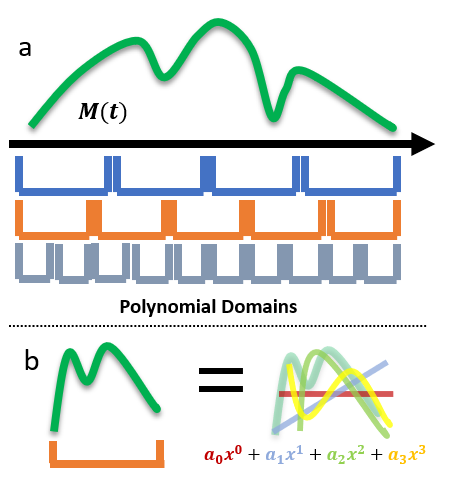

Now we create a `Polynomial_features` object that can split a given array into `(4,5,10)` equal bins and we fit a polynomial of order `3` on each bin. We then `extract` the features for all curves from the rescaled_dataset (`rscl_df`)

In [5]:
polynomial_features = Polynomial_features(n_splits=[4,5,10], order_fits=[3,3,3])
%time pf_dataset = polynomial_features.extract(rscl_df.to_numpy())
print(pf_dataset.shape)

Wall time: 7.84 s
(5000, 76)


In [6]:
rscl_df.head()

,feat_0,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_290,feat_291,feat_292,feat_293,feat_294,feat_295,feat_296,feat_297,feat_298,feat_299
0,0.046998,0.047899,0.048976,0.050135,0.051244,0.052152,0.052715,0.052829,0.052453,0.051630,...,0.076163,0.073727,0.071628,0.069927,0.068620,0.067656,0.066954,0.066416,0.065942,0.065440
1,0.033260,0.032670,0.032096,0.031726,0.031692,0.032041,0.032729,0.033647,0.034668,0.035671,...,0.009927,0.009936,0.010065,0.010292,0.010670,0.011258,0.012027,0.012833,0.013472,0.013761
2,0.036057,0.035182,0.034550,0.034317,0.034548,0.035204,0.036165,0.037262,0.038330,0.039254,...,0.051485,0.050636,0.049978,0.049500,0.049118,0.048694,0.048080,0.047161,0.045886,0.044295
3,0.046061,0.047268,0.048244,0.048961,0.049426,0.049685,0.049820,0.049934,0.050135,0.050511,...,0.035593,0.034321,0.032943,0.031631,0.030542,0.029780,0.029382,0.029326,0.029558,0.030009
4,0.048227,0.049512,0.050739,0.051835,0.052745,0.053455,0.053991,0.054416,0.054804,0.055227,...,0.039747,0.038892,0.038193,0.037767,0.037657,0.037831,0.038193,0.038614,0.038968,0.039153


In [7]:
pf_dataset.head()

,4_1_3,4_1_2,4_1_1,4_1_0,4_2_3,4_2_2,4_2_1,4_2_0,4_3_3,4_3_2,...,10_8_1,10_8_0,10_9_3,10_9_2,10_9_1,10_9_0,10_10_3,10_10_2,10_10_1,10_10_0
0,-2.803564e-07,0.000014,0.001829,0.083943,1.892147e-06,0.000163,0.008879,0.360918,-5.586193e-08,0.000307,...,0.002309,0.083844,7.849371e-07,-0.000016,-0.000236,0.095559,-3.413139e-07,-0.000046,-0.000825,0.083165
1,1.416806e-07,0.000019,0.001632,0.069931,9.861831e-07,0.000134,0.010010,0.407446,-1.012685e-06,0.000165,...,-0.003856,0.075882,-1.610505e-06,0.000007,-0.000914,0.015629,2.210606e-06,-0.000014,-0.000039,0.011011
2,1.834305e-07,0.000006,0.001375,0.079726,1.483040e-06,0.000138,0.009670,0.387276,-1.278877e-07,0.000251,...,0.001863,0.051793,2.125097e-06,0.000012,-0.000798,0.058366,-3.641176e-06,-0.000021,0.000376,0.051556
3,-3.027449e-08,0.000026,0.001742,0.077971,1.312491e-06,0.000133,0.009490,0.404720,-1.389840e-06,0.000192,...,-0.001103,0.009640,1.053047e-07,-0.000058,0.000665,0.042560,1.433586e-06,-0.000008,-0.000810,0.038228
4,8.582691e-08,0.000025,0.001638,0.081954,1.256443e-06,0.000145,0.009451,0.395299,-9.384739e-07,0.000216,...,0.002390,0.015731,2.757922e-06,-0.000019,-0.000288,0.056697,9.078677e-07,0.000037,-0.000885,0.042304


In `pf_dataset`, each column name refers to a particular kind of feature. For example:
1. `4_1_3` refers to the value of the coefficient of $x^3$ in the `1`$^{st}$ partition when the entire array is split into `4`-equal parts. 
2. `10_8_1` refers to the value of the coefficient of $x^1$ in the `8`$^{th}$ partition whent the entire array is split into `10` equal parts

## Example of Polynomial Featurization on a sample Magentization curve:

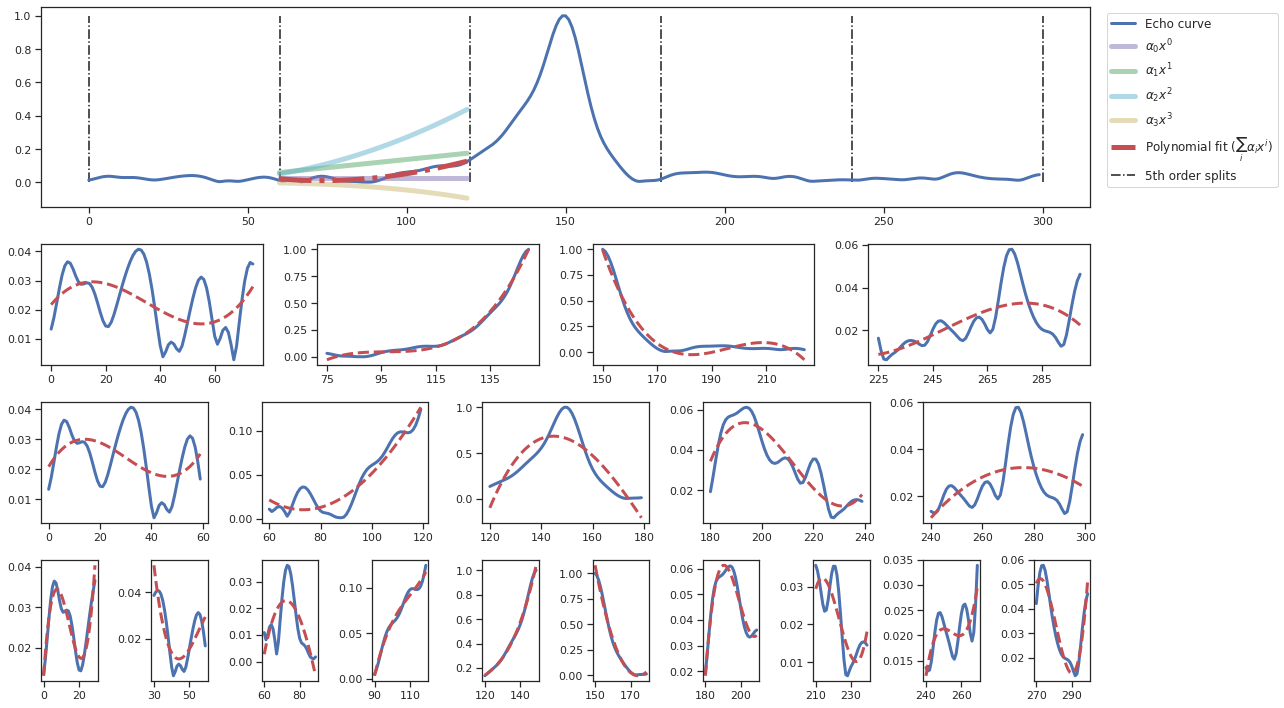

# References: 

1. Torrisi, S. B., Carbone, M. R., Rohr, B. A., Montoya, J. H., Ha, Y., Yano, J., ... & Hung, L. (2020). Random forest machine learning models for interpretable X-ray absorption near-edge structure spectrum-property relationships. npj Computational Materials, 6(1), 1-11.